<a href="https://colab.research.google.com/github/CongSheng/AIfinity2021/blob/main/DataExplorationCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Core Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import datetime as dt
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataDir = "/content/drive/MyDrive/AIfinity_SensitiveContent/Data/"
salesDf_A = pd.read_excel(dataDir + "Master Data (Sales).xlsx", sheet_name='Sales - Outlet 1')
purchaseDf_A = pd.read_excel(dataDir + "Master Data (Purchase).xlsx", sheet_name='Purchase - Outlet 1')

salesDf_B = pd.read_excel(dataDir + "Master Data (Sales).xlsx", sheet_name='Sales - Outlet 2')
purchaseDf_B = pd.read_excel(dataDir + "Master Data (Purchase).xlsx", sheet_name='Purchase - Outlet 2')

salesDf_C = pd.read_excel(dataDir + "Master Data (Sales).xlsx", sheet_name='Sales - Outlet 3')
purchaseDf_C = pd.read_excel(dataDir + "Master Data (Purchase).xlsx", sheet_name='Purchase - Outlet 3')

In [ ]:
salesDf_A.head()

,SKU,Product - English Name,Product - Chinese Name,Date of Sale,Amount Sold
0,A013,Mushroom Combo,菌类拼盘,2018/01/01,14
1,A013,Mushroom Combo,菌类拼盘,2018/01/02,7
2,A013,Mushroom Combo,菌类拼盘,2018/01/03,7
3,A013,Mushroom Combo,菌类拼盘,2018/01/04,6
4,A013,Mushroom Combo,菌类拼盘,2018/01/05,15


In [ ]:
purchaseDf_A.head()

,SKU,Product Name - English,Product Name - Chinese,Date of Purchase,Quantity of Order Placed,Quantity of Order Received
0,A001,Enoki Mushroom,金针菇,2018/01/01,120.0,120.0
1,A001,Enoki Mushroom,金针菇,2018/01/02,80.0,80.0
2,A001,Enoki Mushroom,金针菇,2018/01/03,50.0,50.0
3,A001,Enoki Mushroom,金针菇,2018/01/04,30.0,30.0
4,A001,Enoki Mushroom,金针菇,2018/01/05,100.0,100.0


In [ ]:
salesDf_A.describe()

,Amount Sold
count,14292.000000
mean,6.185418
std,5.955228
min,0.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,70.000000


In [ ]:
purchaseDf_A.describe()

,Quantity of Order Placed,Quantity of Order Received
count,9985.000000,9985.000000
mean,10.591376,10.472248
std,19.423712,19.436830
min,0.160000,0.000000
25%,2.000000,1.900000
50%,4.000000,4.000000
75%,8.000000,8.000000
max,200.000000,200.000000


In [ ]:
purchaseDf_A["Difference"]=purchaseDf_A["Quantity of Order Placed"]-purchaseDf_A["Quantity of Order Received"]
purchaseDf_A.describe()

,Quantity of Order Placed,Quantity of Order Received,Difference
count,9985.000000,9985.000000,9985.000000
mean,10.591376,10.472248,0.119128
std,19.423712,19.436830,1.510920
min,0.160000,0.000000,-20.000000
25%,2.000000,1.900000,0.000000
50%,4.000000,4.000000,0.000000
75%,8.000000,8.000000,0.000000
max,200.000000,200.000000,40.000000


In [ ]:
purchaseDf_A.SKU.unique()

array(['A001', 'A002', 'A003', 'A004', 'A005', 'A006', 'A007', 'A008',
       'A009', 'A010', 'A011', 'A012'], dtype=object)

In [ ]:
salesDf_A.SKU.unique()

array(['A013', 'A014', 'A001-1', 'A005-1', 'A004-1', 'A003-1', 'A002-1',
       'A007-1', 'A006-1', 'A009-1', 'A012-1', 'A008-1', 'A011-1',
       'A010-1', 'A004-2', 'A003-2', 'A002-2', 'A006-2'], dtype=object)

# Breaking into Constituents

In [ ]:
enokiDict = {
  "A001-1": 2,
  "A001-2": 3,
  "A013": 1
}
oysterDict = {
  "A002-1":1,
  "A002-2":0.5,
  "A013":0.5 
}
shiitakeDict = {
    "A003-1":0.085,
    "A003-2":0.043,
    "A013":0.043
}
pleurotusDict = {
    "A004-1":0.15,
    "A004-2":0.075,
    "A013":0.075
}
crabDict = {
    "A005-1":1,
    "A005-2":0.5,
    "A013":0.5
}
bambooDict = {
    "A006-1":1,
    "A006-2":0.5
}
spinachDict = {
    "A007-1":0.125,
    "A014":0.065
}
crownDict = {
    "A008-1":0.125,
    "A014":0.065
}
indianDict = {
    "A009-1":0.15,
    "A014":0.075
}
freshDict = {
    "A010-1":0.1,
    "A014":0.05
}
chineseDict = {
    "A011-1":0.2,
    "A014":0.1
}
babyDict = {
    "A012-1":0.14
}

In [ ]:
salesDf_A['A001'] = salesDf_A['SKU'].apply(lambda x: '0' if (x!="A001-1" and x!="A001-2" and x!="A013") else enokiDict.get(x))
salesDf_A['A002'] = salesDf_A['SKU'].apply(lambda x: '0' if (x!="A002-1" and x!="A002-2" and x!="A013") else oysterDict.get(x))
salesDf_A['A003'] = salesDf_A['SKU'].apply(lambda x: '0' if (x!="A003-1" and x!="A003-2" and x!="A013") else shiitakeDict.get(x))
salesDf_A['A004'] = salesDf_A['SKU'].apply(lambda x: '0' if (x!="A004-1" and x!="A004-2" and x!="A013") else pleurotusDict.get(x))
salesDf_A['A005'] = salesDf_A['SKU'].apply(lambda x: '0' if (x!="A005-1" and x!="A005-2" and x!="A013") else crabDict.get(x))
salesDf_A['A006'] = salesDf_A['SKU'].apply(lambda x: '0' if (x!="A006-1" and x!="A006-2") else bambooDict.get(x))
salesDf_A['A007'] = salesDf_A['SKU'].apply(lambda x: '0' if (x!="A007-1" and x!="A014") else spinachDict.get(x))
salesDf_A['A008'] = salesDf_A['SKU'].apply(lambda x: '0' if (x!="A008-1" and x!="A014") else crownDict.get(x))
salesDf_A['A009'] = salesDf_A['SKU'].apply(lambda x: '0' if (x!="A009-1" and x!="A014") else indianDict.get(x))
salesDf_A['A010'] = salesDf_A['SKU'].apply(lambda x: '0' if (x!="A010-1" and x!="A014") else freshDict.get(x))
salesDf_A['A011'] = salesDf_A['SKU'].apply(lambda x: '0' if (x!="A011-1" and x!="A014") else chineseDict.get(x))
salesDf_A['A012'] = salesDf_A['SKU'].apply(lambda x: '0' if (x!="A012-1" and x!="A014") else babyDict.get(x))

In [ ]:
salesDf_A.tail()

,SKU,Product - English Name,Product - Chinese Name,Date of Sale,Amount Sold,A001,A002,A003,A004,A005,A006,A007,A008,A009,A010,A011,A012
14287,A006-2,Bamboo Shoot (Half),笋片（半份）,2020/12/27,2,0,0,0,0,0,0.5,0,0,0,0,0,0
14288,A006-2,Bamboo Shoot (Half),笋片（半份）,2020/12/28,1,0,0,0,0,0,0.5,0,0,0,0,0,0
14289,A006-2,Bamboo Shoot (Half),笋片（半份）,2020/12/29,1,0,0,0,0,0,0.5,0,0,0,0,0,0
14290,A006-2,Bamboo Shoot (Half),笋片（半份）,2020/12/30,1,0,0,0,0,0,0.5,0,0,0,0,0,0
14291,A006-2,Bamboo Shoot (Half),笋片（半份）,2020/12/31,5,0,0,0,0,0,0.5,0,0,0,0,0,0


In [ ]:
(salesDf_A[salesDf_A["Date of Sale"] == "2018/01/01"]["A001"]).astype(float).sum()

3.0

In [ ]:
salesDf_A["Date of Sale"].unique()[1]

'2018/01/02'

In [ ]:
salesDf_A["A001"]=salesDf_A["A001"].astype(float)*salesDf_A["Amount Sold"]
salesDf_A["A002"]=salesDf_A["A002"].astype(float)*salesDf_A["Amount Sold"]
salesDf_A["A003"]=salesDf_A["A003"].astype(float)*salesDf_A["Amount Sold"]
salesDf_A["A004"]=salesDf_A["A004"].astype(float)*salesDf_A["Amount Sold"]
salesDf_A["A005"]=salesDf_A["A005"].astype(float)*salesDf_A["Amount Sold"]
salesDf_A["A006"]=salesDf_A["A006"].astype(float)*salesDf_A["Amount Sold"]
salesDf_A["A007"]=salesDf_A["A007"].astype(float)*salesDf_A["Amount Sold"]
salesDf_A["A008"]=salesDf_A["A008"].astype(float)*salesDf_A["Amount Sold"]
salesDf_A["A009"]=salesDf_A["A009"].astype(float)*salesDf_A["Amount Sold"]
salesDf_A["A010"]=salesDf_A["A010"].astype(float)*salesDf_A["Amount Sold"]
salesDf_A["A011"]=salesDf_A["A011"].astype(float)*salesDf_A["Amount Sold"]
salesDf_A["A012"]=salesDf_A["A012"].astype(float)*salesDf_A["Amount Sold"]


In [ ]:
salesDf_A.head()

,SKU,Product - English Name,Product - Chinese Name,Date of Sale,Amount Sold,A001,A002,A003,A004,A005,A006,A007,A008,A009,A010,A011,A012
0,A013,Mushroom Combo,菌类拼盘,2018/01/01,14,14.0,7.0,0.602,1.050,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A013,Mushroom Combo,菌类拼盘,2018/01/02,7,7.0,3.5,0.301,0.525,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A013,Mushroom Combo,菌类拼盘,2018/01/03,7,7.0,3.5,0.301,0.525,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A013,Mushroom Combo,菌类拼盘,2018/01/04,6,6.0,3.0,0.258,0.450,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A013,Mushroom Combo,菌类拼盘,2018/01/05,15,15.0,7.5,0.645,1.125,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
salesDf_A['A001'] = salesDf_A.groupby(['Date of Sale'])['A001'].transform('sum')
salesDf_A['A002'] = salesDf_A.groupby(['Date of Sale'])['A002'].transform('sum')
salesDf_A['A003'] = salesDf_A.groupby(['Date of Sale'])['A003'].transform('sum')
salesDf_A['A004'] = salesDf_A.groupby(['Date of Sale'])['A004'].transform('sum')
salesDf_A['A005'] = salesDf_A.groupby(['Date of Sale'])['A005'].transform('sum')
salesDf_A['A006'] = salesDf_A.groupby(['Date of Sale'])['A006'].transform('sum')
salesDf_A['A007'] = salesDf_A.groupby(['Date of Sale'])['A007'].transform('sum')
salesDf_A['A008'] = salesDf_A.groupby(['Date of Sale'])['A008'].transform('sum')
salesDf_A['A009'] = salesDf_A.groupby(['Date of Sale'])['A009'].transform('sum')
salesDf_A['A010'] = salesDf_A.groupby(['Date of Sale'])['A010'].transform('sum')
salesDf_A['A011'] = salesDf_A.groupby(['Date of Sale'])['A011'].transform('sum')
salesDf_A['A012'] = salesDf_A.groupby(['Date of Sale'])['A012'].transform('sum')

In [ ]:
salesDf_A.tail()

,SKU,Product - English Name,Product - Chinese Name,Date of Sale,Amount Sold,A001,A002,A003,A004,A005,A006,A007,A008,A009,A010,A011,A012
14287,A006-2,Bamboo Shoot (Half),笋片（半份）,2020/12/27,2,31.0,3.0,0.342,0.600,1.5,3.0,0.945,1.570,0.825,0.15,1.7,0.98
14288,A006-2,Bamboo Shoot (Half),笋片（半份）,2020/12/28,1,49.0,9.0,0.301,0.975,2.5,0.5,1.330,1.705,0.825,0.45,2.7,1.12
14289,A006-2,Bamboo Shoot (Half),笋片（半份）,2020/12/29,1,41.0,6.0,0.386,0.600,2.5,2.5,0.830,1.455,0.675,0.45,1.9,1.54
14290,A006-2,Bamboo Shoot (Half),笋片（半份）,2020/12/30,1,42.0,8.0,0.687,1.500,6.0,2.5,1.765,1.515,1.200,0.60,3.6,0.98
14291,A006-2,Bamboo Shoot (Half),笋片（半份）,2020/12/31,5,97.0,19.5,1.029,1.950,10.5,5.5,3.170,2.545,2.700,1.30,5.0,2.38


In [ ]:
salesDf_A[salesDf_A['Date of Sale'] =='2020/05/20']

,SKU,Product - English Name,Product - Chinese Name,Date of Sale,Amount Sold,A001,A002,A003,A004,A005,A006,A007,A008,A009,A010,A011,A012
11849,A011-1,Chinese Cabbage,大白菜,2020/05/20,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0


In [ ]:
constituentDf_A = salesDf_A.drop_duplicates(subset="Date of Sale").drop(columns=["SKU", "Product - English Name", "Product - Chinese Name", "Amount Sold"])

In [ ]:
constituentDf_A = constituentDf_A.rename(columns={"Date of Sale":"Date"})
purchaseDf_A = purchaseDf_A.rename(columns={"Date of Purchase":"Date"})

In [ ]:
constituentDf_A

,Date,A001,A002,A003,A004,A005,A006,A007,A008,A009,A010,A011,A012
0,2018/01/01,98.0,10.0,1.537,3.150,10.0,5.0,2.465,3.965,2.925,1.45,4.7,2.66
1,2018/01/02,43.0,6.5,0.556,0.825,3.5,1.0,1.070,1.070,0.675,0.55,2.1,0.70
2,2018/01/03,51.0,12.5,0.471,0.825,5.5,3.0,0.635,1.885,0.750,0.50,2.4,1.96
3,2018/01/04,40.0,10.0,0.513,0.750,4.0,3.0,1.010,1.385,0.600,0.50,2.0,0.70
4,2018/01/05,101.0,22.5,1.325,2.175,9.5,4.0,1.770,3.520,1.350,1.00,6.4,1.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10816,2020/04/21,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.125,0.000,0.00,0.0,0.00
10823,2020/05/07,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.125,0.000,0.00,0.0,0.00
10835,2020/06/08,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.250,0.000,0.00,0.0,0.00
10837,2020/06/12,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.250,0.000,0.00,0.0,0.00


# Merge to Purchase Data for close-referencing (Removing Dec 2020 Data)

In [ ]:
meltDf_A = pd.melt(constituentDf_A, id_vars="Date", var_name="SKU", value_name="Sold")

In [ ]:
meltDf_A

,Date,SKU,Sold
0,2018/01/01,A001,98.0
1,2018/01/02,A001,43.0
2,2018/01/03,A001,51.0
3,2018/01/04,A001,40.0
4,2018/01/05,A001,101.0
...,...,...,...
12859,2020/04/21,A012,0.0
12860,2020/05/07,A012,0.0
12861,2020/06/08,A012,0.0
12862,2020/06/12,A012,0.0


In [ ]:
joinedDf_A = meltDf_A.merge(purchaseDf_A, on=["Date","SKU"]).sort_values("Date")
joinedDf_A

,Date,SKU,Sold,Product Name - English,Product Name - Chinese,Quantity of Order Placed,Quantity of Order Received,Difference
0,2018/01/01,A001,98.000,Enoki Mushroom,金针菇,120.0,120.0,0.0
1780,2018/01/01,A003,1.537,Shiitake Mushroom,香菇,1.5,2.0,-0.5
9121,2018/01/01,A012,2.660,Baby Cabbage,娃娃菜,10.0,10.0,0.0
8404,2018/01/01,A011,4.700,Chinese Cabbage,大白菜,6.0,6.1,-0.1
3369,2018/01/01,A005,10.000,Buna Shimeiji,蟹味菇,8.0,8.0,0.0
...,...,...,...,...,...,...,...,...
1747,2020/11/30,A002,3.500,Oyster Mushroom,平菇,10.0,10.0,0.0
4748,2020/11/30,A006,1.000,Bamboo Shoot,笋片,5.0,5.0,0.0
4179,2020/11/30,A005,1.000,Buna Shimeiji,蟹味菇,5.0,5.0,0.0
6552,2020/11/30,A008,0.635,Tung Oh,茼蒿,1.5,1.5,0.0


In [ ]:
joinedDf_A["Date"]=pd.to_datetime(joinedDf_A["Date"]).dt.date

# Visualising Data

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
constituentDf_A["Date"]=pd.to_datetime(constituentDf_A["Date"])
constituentDf_A = constituentDf_A.sort_values("Date")
constituentDf_A

,Date,A001,A002,A003,A004,A005,A006,A007,A008,A009,A010,A011,A012
0,2018-01-01,98.0,10.0,1.537,3.150,10.0,5.0,2.465,3.965,2.925,1.45,4.7,2.66
1,2018-01-02,43.0,6.5,0.556,0.825,3.5,1.0,1.070,1.070,0.675,0.55,2.1,0.70
2,2018-01-03,51.0,12.5,0.471,0.825,5.5,3.0,0.635,1.885,0.750,0.50,2.4,1.96
3,2018-01-04,40.0,10.0,0.513,0.750,4.0,3.0,1.010,1.385,0.600,0.50,2.0,0.70
4,2018-01-05,101.0,22.5,1.325,2.175,9.5,4.0,1.770,3.520,1.350,1.00,6.4,1.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020-12-27,31.0,3.0,0.342,0.600,1.5,3.0,0.945,1.570,0.825,0.15,1.7,0.98
996,2020-12-28,49.0,9.0,0.301,0.975,2.5,0.5,1.330,1.705,0.825,0.45,2.7,1.12
997,2020-12-29,41.0,6.0,0.386,0.600,2.5,2.5,0.830,1.455,0.675,0.45,1.9,1.54
998,2020-12-30,42.0,8.0,0.687,1.500,6.0,2.5,1.765,1.515,1.200,0.60,3.6,0.98


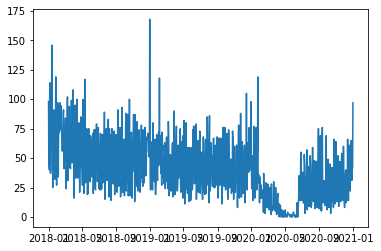

In [ ]:
plt.plot(constituentDf_A["Date"], constituentDf_A["A001"])

In [ ]:
purchaseDf_A

,SKU,Product Name - English,Product Name - Chinese,Date,Quantity of Order Placed,Quantity of Order Received,Difference
0,A001,Enoki Mushroom,金针菇,2018/01/01,120.0,120.0,0.0
1,A001,Enoki Mushroom,金针菇,2018/01/02,80.0,80.0,0.0
2,A001,Enoki Mushroom,金针菇,2018/01/03,50.0,50.0,0.0
3,A001,Enoki Mushroom,金针菇,2018/01/04,30.0,30.0,0.0
4,A001,Enoki Mushroom,金针菇,2018/01/05,100.0,100.0,0.0
...,...,...,...,...,...,...,...
9980,A012,Baby Cabbage,娃娃菜,2020/11/24,5.0,5.0,0.0
9981,A012,Baby Cabbage,娃娃菜,2020/11/25,3.0,3.0,0.0
9982,A012,Baby Cabbage,娃娃菜,2020/11/27,8.0,8.0,0.0
9983,A012,Baby Cabbage,娃娃菜,2020/11/28,5.0,5.0,0.0


In [ ]:
constituentDf_A

,Date,A001,A002,A003,A004,A005,A006,A007,A008,A009,A010,A011,A012
0,2018-01-01,98.0,10.0,1.537,3.150,10.0,5.0,2.465,3.965,2.925,1.45,4.7,2.66
1,2018-01-02,43.0,6.5,0.556,0.825,3.5,1.0,1.070,1.070,0.675,0.55,2.1,0.70
2,2018-01-03,51.0,12.5,0.471,0.825,5.5,3.0,0.635,1.885,0.750,0.50,2.4,1.96
3,2018-01-04,40.0,10.0,0.513,0.750,4.0,3.0,1.010,1.385,0.600,0.50,2.0,0.70
4,2018-01-05,101.0,22.5,1.325,2.175,9.5,4.0,1.770,3.520,1.350,1.00,6.4,1.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020-12-27,31.0,3.0,0.342,0.600,1.5,3.0,0.945,1.570,0.825,0.15,1.7,0.98
996,2020-12-28,49.0,9.0,0.301,0.975,2.5,0.5,1.330,1.705,0.825,0.45,2.7,1.12
997,2020-12-29,41.0,6.0,0.386,0.600,2.5,2.5,0.830,1.455,0.675,0.45,1.9,1.54
998,2020-12-30,42.0,8.0,0.687,1.500,6.0,2.5,1.765,1.515,1.200,0.60,3.6,0.98


# Train, Validation and Test Data Setup

In [ ]:
enokiData=joinedDf_A[joinedDf_A["SKU"]=="A001"]
enokiData=enokiData.drop(columns=["Difference"])
enokiData

,Date,SKU,Sold,Product Name - English,Product Name - Chinese,Quantity of Order Placed,Quantity of Order Received
0,2018-01-01,A001,98.0,Enoki Mushroom,金针菇,120.0,120.0
1,2018-01-02,A001,43.0,Enoki Mushroom,金针菇,80.0,80.0
2,2018-01-03,A001,51.0,Enoki Mushroom,金针菇,50.0,50.0
3,2018-01-04,A001,40.0,Enoki Mushroom,金针菇,30.0,30.0
4,2018-01-05,A001,101.0,Enoki Mushroom,金针菇,100.0,100.0
...,...,...,...,...,...,...,...
818,2020-11-26,A001,30.0,Enoki Mushroom,金针菇,50.0,50.0
819,2020-11-27,A001,60.0,Enoki Mushroom,金针菇,50.0,50.0
820,2020-11-28,A001,39.0,Enoki Mushroom,金针菇,70.0,70.0
821,2020-11-29,A001,28.0,Enoki Mushroom,金针菇,30.0,30.0


In [ ]:
date_before_test = dt.date(2020, 1, 1)
date_before_valid = dt.date(2019, 6, 1)
enokiDataTrain = enokiData[enokiData["Date"]<date_before_valid].set_index('Date')
enokiDataValid = enokiData[enokiData["Date"]>date_before_valid]
enokiDataValid = enokiDataValid[enokiDataValid["Date"]<date_before_test].set_index('Date')
enokiDataTest = enokiData[enokiData["Date"]>date_before_test].set_index('Date')

In [ ]:
columns_titles = ["Quantity of Order Placed","Sold"]

In [ ]:
enokiDataValid = enokiDataValid.drop(columns=["SKU", "Product Name - English", "Product Name - Chinese","Quantity of Order Received"]).reindex(columns=columns_titles)

In [ ]:
enokiDataTrain = enokiDataTrain.drop(columns=["SKU", "Product Name - English", "Product Name - Chinese","Quantity of Order Received"]).reindex(columns=columns_titles)

In [ ]:
enokiDataTest = enokiDataTest.drop(columns=["SKU", "Product Name - English", "Product Name - Chinese","Quantity of Order Received"]).reindex(columns=columns_titles)


In [ ]:
enokiDataTrain

,Quantity of Order Placed,Sold
Date,,
2018-01-01,120.0,98.0
2018-01-02,80.0,43.0
2018-01-03,50.0,51.0
2018-01-04,30.0,40.0
2018-01-05,100.0,101.0
...,...,...
2019-04-15,30.0,42.0
2019-04-16,50.0,44.0
2019-04-17,80.0,34.0


# Testing with GRU

In [ ]:
# Importing dependencies
import numpy as np
np.random.seed(1)
import tensorflow
tensorflow.random.set_seed(2)
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.layers.recurrent import GRU
from keras import optimizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import datetime as dt
import time
plt.style.use('ggplot')

In [ ]:
# Setting up an early stop
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=80,  verbose=1, mode='min')
callbacks_list = [earlystop]

In [ ]:
enokiDataTrain

,Quantity of Order Placed,Sold
Date,,
2018-01-01,120.0,98.0
2018-01-02,80.0,43.0
2018-01-03,50.0,51.0
2018-01-04,30.0,40.0
2018-01-05,100.0,101.0
...,...,...
2019-04-15,30.0,42.0
2019-04-16,50.0,44.0
2019-04-17,80.0,34.0


In [ ]:
#Build and train the model
def fit_model(train,val,timesteps,hl,lr,batch,epochs):
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []
  
    # Loop for training data
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i])
        Y_train.append(train[i][0])
    X_train,Y_train = np.array(X_train),np.array(Y_train)
  
    # Loop for val data
    for i in range(timesteps,val.shape[0]):
        X_val.append(val[i-timesteps:i])
        Y_val.append(val[i][0])
    X_val,Y_val = np.array(X_val),np.array(Y_val)
  
    # Adding Layers to the model
    model = Sequential()
    model.add(GRU(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                  activation = 'relu'))
    for i in range(len(hl)-1):        
        model.add(GRU(hl[i],activation = 'relu',return_sequences = True))
    model.add(GRU(hl[-1],activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = optimizers.Adam(lr = lr), loss = 'mean_squared_error')
  
    # Training the data
    history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 0,
                        shuffle = False, callbacks=callbacks_list)
    model.reset_states()
    return model, history.history['loss'], history.history['val_loss']

In [ ]:
# Evaluating the model
def evaluate_model(model,test,timesteps):
    X_test = []
    Y_test = []

    # Loop for testing data
    for i in range(timesteps,test.shape[0]):
        X_test.append(test[i-timesteps:i])
        Y_test.append(test[i][0])
    X_test,Y_test = np.array(X_test),np.array(Y_test)
  
    # Prediction Time !!!!
    Y_hat = model.predict(X_test)
    mse = mean_squared_error(Y_test,Y_hat)
    rmse = sqrt(mse)
    r2 = r2_score(Y_test,Y_hat)
    return mse,rmse, r2, Y_test, Y_hat

In [ ]:
# Plotting the predictions
def plot_data(Y_test,Y_hat):
    plt.plot(Y_test,c = 'r')
    plt.plot(Y_hat,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Order Placed')
    plt.title("Order Placed Predictions Using GRU")
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()

In [ ]:
# Plotting the training errors
def plot_error(train_loss,val_loss):
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title('Loss Plot')
    plt.legend(['train','val'],loc = 'lower right')
    plt.show()

In [ ]:
# Normalisation
sc = MinMaxScaler()
train = sc.fit_transform(enokiDataTrain)
val = sc.transform(enokiDataValid)
test = sc.transform(enokiDataTest)
print(train.shape,val.shape,test.shape)

(450, 2) (165, 2) (245, 2)


In [68]:
timesteps = 20
hl = [60,30]
lr = 1e-4
batch_size = 2
num_epochs = 200

Epoch 00191: early stopping


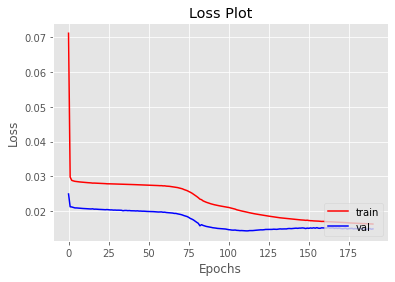

In [ ]:
model,train_error,val_error = fit_model(train,val,timesteps,hl,lr,batch_size,num_epochs)
plot_error(train_error,val_error)

MSE = 0.029218594550730805
RMSE = 0.17093447443605636
R2-Score = -1.422572319200392


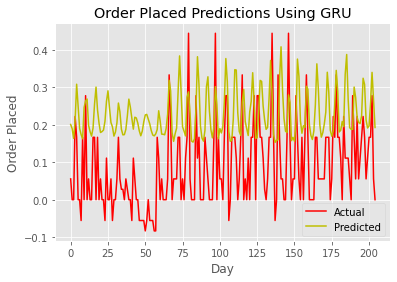

In [ ]:
mse,rmse,r2_value,true,predicted = evaluate_model(model,test,40)
print("MSE =",mse)
print("RMSE =",rmse)
print("R2-Score =",r2_value)
plot_data(true,predicted)


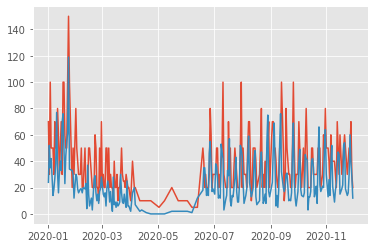

In [ ]:
plt.plot(enokiDataTest)

# Testing with CNN

In [ ]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten
#Build and train the model
def fit_modelCNN(train,val,timesteps,hl,lr,batch,epochs):
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []
  
    # Loop for training data
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i])
        Y_train.append(train[i][0])
    X_train,Y_train = np.array(X_train),np.array(Y_train)
  
    # Loop for val data
    for i in range(timesteps,val.shape[0]):
        X_val.append(val[i-timesteps:i])
        Y_val.append(val[i][0])
    X_val,Y_val = np.array(X_val),np.array(Y_val)
  
    # Adding Layers to the model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=4, activation='relu', padding='same', input_shape=(timesteps, X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    model.add(Conv1D(filters=32, kernel_size=2, activation='relu', padding='same', input_shape=(timesteps, X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer = optimizers.Adam(lr = lr), loss = 'mean_squared_error')
  
    # Training the data
    history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 0,
                        shuffle = False, callbacks=callbacks_list)
    model.reset_states()
    return model, history.history['loss'], history.history['val_loss']

In [ ]:
# Plotting the predictions
def plot_dataCNN(Y_test,Y_hat):
    plt.plot(Y_test,c = 'r')
    plt.plot(Y_hat,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Order Placed')
    plt.title("Order Placed Predictions Using CNN")
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()

Epoch 00095: early stopping


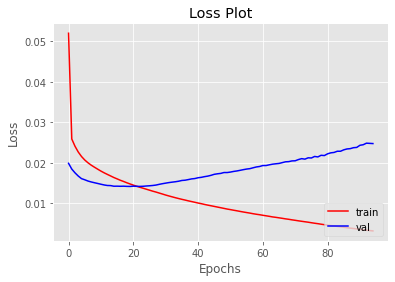

In [ ]:
model,train_error,val_error = fit_modelCNN(train,val,timesteps,hl,lr,batch_size,num_epochs)
plot_error(train_error,val_error)

In [ ]:
mse,rmse,r2_value,true,predicted = evaluate_model(model,test,1)
print("MSE =",mse)
print("RMSE =",rmse)
print("R2-Score =",r2_value)
plot_data(true,predicted)

ValueError: ignored

In [ ]:
print(np.min(test))

# RNN

In [ ]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.layers.recurrent import SimpleRNN
from keras import optimizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [ ]:
#Build and train the model
def fit_model_RNN(train,val,timesteps,hl,lr,batch,epochs):
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []
  
    # Loop for training data
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i])
        Y_train.append(train[i][0])
    X_train,Y_train = np.array(X_train),np.array(Y_train)
  
    # Loop for val data
    for i in range(timesteps,val.shape[0]):
        X_val.append(val[i-timesteps:i])
        Y_val.append(val[i][0])
    X_val,Y_val = np.array(X_val),np.array(Y_val)
    
    # Adding Layers to the model
    model = Sequential()
    model.add(SimpleRNN(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                        activation = 'relu'))
    for i in range(len(hl)-1):        
        model.add(SimpleRNN(hl[i],activation = 'relu',return_sequences = True))
    model.add(SimpleRNN(hl[-1],activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = optimizers.Adam(lr = lr), loss = 'mean_squared_error')
    #print(model.summary())
  
    # Training the data
    history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 0,
                        shuffle = False, callbacks=callbacks_list)
    model.reset_states()
    return model, history.history['loss'], history.history['val_loss']

In [138]:
# Plotting the predictions
def plot_dataRNN(Y_test,Y_hat):
    plt.plot(Y_test,c = 'r')
    plt.plot(Y_hat,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Order Placed')
    plt.title("Order Placed Predictions Using RNN")
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()

In [ ]:
# Normalisation
sc = MinMaxScaler()
train = sc.fit_transform(enokiDataTrain)
val = sc.transform(enokiDataValid)
test = sc.transform(enokiDataTest)
print(train.shape,val.shape,test.shape)

(450, 2) (165, 2) (245, 2)


In [135]:
timesteps = 10
hl = [50,45]
lr = 1e-3
batch_size = 4
num_epochs = 200

Epoch 00088: early stopping


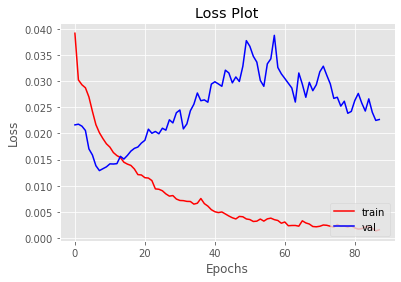

In [136]:
model,train_error,val_error = fit_model_RNN(train,val,timesteps,hl,lr,batch_size,num_epochs)
plot_error(train_error,val_error)

MSE = 0.03820201622786789
RMSE = 0.19545336074846062
R2-Score = -2.1674058411875996


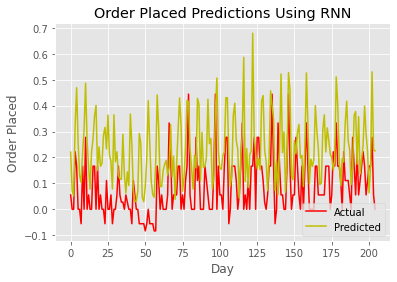

In [140]:
mse,rmse,r2_value,true,predicted = evaluate_model(model,test,40)
print("MSE =",mse)
print("RMSE =",rmse)
print("R2-Score =",r2_value)
plot_dataRNN(true,predicted)

# Testing Prophet

In [122]:
from fbprophet import Prophet

m = Prophet()

In [77]:
enokiData

,Date,SKU,Sold,Product Name - English,Product Name - Chinese,Quantity of Order Placed,Quantity of Order Received
0,2018-01-01,A001,98.0,Enoki Mushroom,金针菇,120.0,120.0
1,2018-01-02,A001,43.0,Enoki Mushroom,金针菇,80.0,80.0
2,2018-01-03,A001,51.0,Enoki Mushroom,金针菇,50.0,50.0
3,2018-01-04,A001,40.0,Enoki Mushroom,金针菇,30.0,30.0
4,2018-01-05,A001,101.0,Enoki Mushroom,金针菇,100.0,100.0
...,...,...,...,...,...,...,...
818,2020-11-26,A001,30.0,Enoki Mushroom,金针菇,50.0,50.0
819,2020-11-27,A001,60.0,Enoki Mushroom,金针菇,50.0,50.0
820,2020-11-28,A001,39.0,Enoki Mushroom,金针菇,70.0,70.0
821,2020-11-29,A001,28.0,Enoki Mushroom,金针菇,30.0,30.0


In [107]:
date_before_test = dt.date(2020, 1, 1)
date_before_valid = dt.date(2019, 6, 1)
enokiDataTrainFB = enokiData[enokiData["Date"]<date_before_valid].set_index('Date')
enokiDataValidFB = enokiData[enokiData["Date"]>date_before_valid]
enokiDataValidFB = enokiDataValidFB[enokiDataValidFB["Date"]<date_before_test].set_index('Date')
enokiDataTestFB = enokiData[enokiData["Date"]>date_before_test].set_index('Date')
enokiDataTrainFB.reset_index(inplace=True)
enokiDataValidFB.reset_index(inplace=True)
enokiDataTestFB.reset_index(inplace=True)

In [108]:
columns_titles = ["Quantity of Order Placed","Sold"]
enokiDataTrainFB = enokiDataTrainFB.drop(columns=["SKU", "Product Name - English", "Product Name - Chinese","Quantity of Order Received"])
enokiDataValidFB = enokiDataValidFB.drop(columns=["SKU", "Product Name - English", "Product Name - Chinese","Quantity of Order Received"])
enokiDataTestFB = enokiDataTestFB.drop(columns=["SKU", "Product Name - English", "Product Name - Chinese","Quantity of Order Received"])
enokiDataTrainFB = enokiDataTrainFB.rename(columns={"Date": "ds", "Quantity of Order Placed": "y"})
enokiDataValidFB = enokiDataValidFB.rename(columns={"Date": "ds", "Quantity of Order Placed": "y"})
enokiDataTestFB = enokiDataTestFB.rename(columns={"Date": "ds", "Quantity of Order Placed": "y"})

In [123]:
m.add_regressor('Sold', mode = "multiplicative")
m.fit(enokiDataTrainFB)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [124]:
forecast = m.predict(enokiDataTestFB.drop(columns="y"))

In [125]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Sold,Sold_lower,Sold_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_multiplicative,extra_regressors_multiplicative_lower,extra_regressors_multiplicative_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yhat
0,2020-01-02,81.079202,30.729304,87.058415,78.707669,83.190652,-0.217420,-0.217420,-0.217420,-4.795769,-4.795769,-4.795769,-0.217420,-0.217420,-0.217420,-0.217420,-0.217420,-0.217420,-4.795769,-4.795769,-4.795769,58.655177
1,2020-01-03,81.100041,74.150827,128.019860,78.716680,83.232835,-0.007802,-0.007802,-0.007802,20.204976,20.204976,20.204976,-0.007802,-0.007802,-0.007802,-0.007802,-0.007802,-0.007802,20.204976,20.204976,20.204976,100.672240
2,2020-01-04,81.120881,62.682730,114.599282,78.725691,83.276173,-0.135070,-0.135070,-0.135070,17.332192,17.332192,17.332192,-0.135070,-0.135070,-0.135070,-0.135070,-0.135070,-0.135070,17.332192,17.332192,17.332192,87.496046
3,2020-01-05,81.141720,42.474042,96.785577,78.735309,83.308790,-0.082666,-0.082666,-0.082666,-4.851392,-4.851392,-4.851392,-0.082666,-0.082666,-0.082666,-0.082666,-0.082666,-0.082666,-4.851392,-4.851392,-4.851392,69.582673
4,2020-01-07,81.183399,18.211409,73.021427,78.735475,83.387156,-0.292284,-0.292284,-0.292284,-11.570405,-11.570405,-11.570405,-0.292284,-0.292284,-0.292284,-0.292284,-0.292284,-0.292284,-11.570405,-11.570405,-11.570405,45.884412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2020-11-26,87.935368,39.235989,96.157238,79.702344,95.558791,-0.172502,-0.172502,-0.172502,-4.795769,-4.795769,-4.795769,-0.172502,-0.172502,-0.172502,-0.172502,-0.172502,-0.172502,-4.795769,-4.795769,-4.795769,67.970563
241,2020-11-27,87.956207,85.244111,140.029035,79.698511,95.605556,0.052088,0.052088,0.052088,20.204976,20.204976,20.204976,0.052088,0.052088,0.052088,0.052088,0.052088,0.052088,20.204976,20.204976,20.204976,112.742677
242,2020-11-28,87.977047,66.649747,125.316549,79.694677,95.643405,-0.105125,-0.105125,-0.105125,17.332192,17.332192,17.332192,-0.105125,-0.105125,-0.105125,-0.105125,-0.105125,-0.105125,17.332192,17.332192,17.332192,96.060654
243,2020-11-29,87.997886,37.798804,96.891527,79.698479,95.681255,-0.187475,-0.187475,-0.187475,-4.851392,-4.851392,-4.851392,-0.187475,-0.187475,-0.187475,-0.187475,-0.187475,-0.187475,-4.851392,-4.851392,-4.851392,66.649108


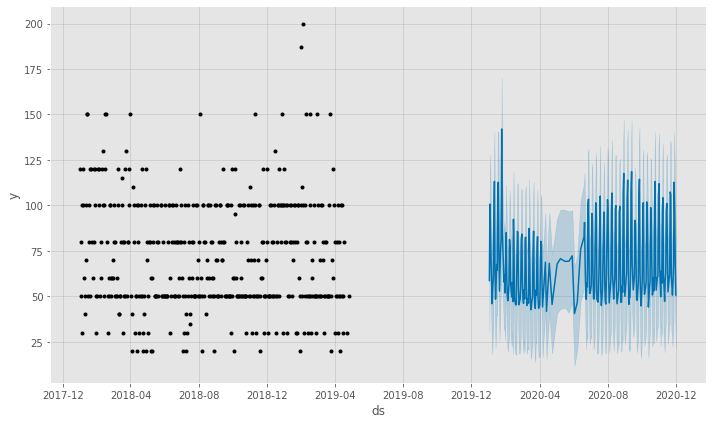

In [126]:
fig1 = m.plot(forecast)

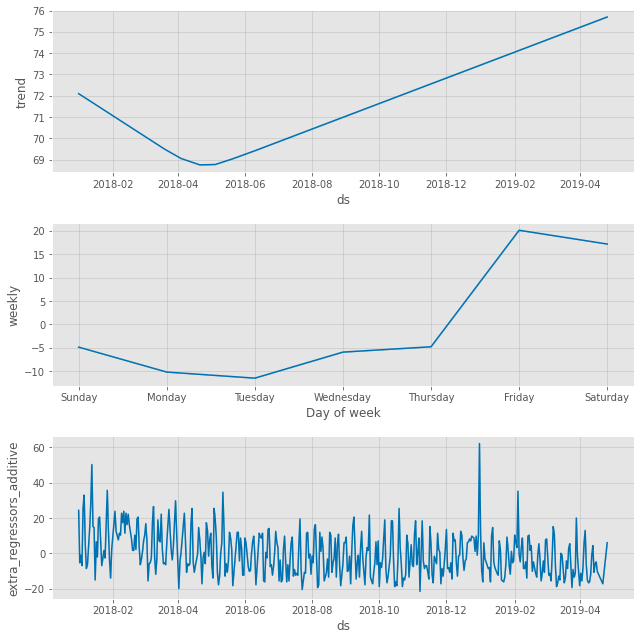

In [117]:
fig2 = m.plot_components(forecast)